_______________________________________________________________________________
***Progetto Data Mining***

# Informazioni sul set di dati <br>
## Contesto <br>
Benvenuti nel mondo dello shopping di Istanbul! <br>
Il nostro set di dati contiene informazioni sugli acquisti da 10 diversi centri commerciali tra il 2021 e il 2023. <br>
Abbiamo raccolto dati da vari gruppi di età e sessi per fornire una visione completa delle abitudini di acquisto a Istanbul. <br>
Il set di dati include informazioni essenziali come numeri di fattura, ID cliente, età, sesso, metodi di pagamento, categorie di prodotti, quantità, prezzo, date degli ordini e posizioni dei centri commerciali. <br>
Ci auguriamo che questo set di dati funga da risorsa preziosa per ricercatori, analisti di dati e appassionati di machine learning che desiderano ottenere informazioni sulle tendenze e sui modelli di acquisto a Istanbul. <br>
Esplora il set di dati e scopri l'affascinante mondo dello shopping di Istanbul! <br>
## Contenuto <br>
###*Informazioni sugli attributi*: <br>
***invoice_no***: numero della fattura. Nominale. Una combinazione della lettera "I" e di un numero intero di 6 cifre assegnato in modo univoco a ciascuna operazione. <br>
***customer_id***: numero cliente. Nominale. Una combinazione della lettera "C" e di un numero intero di 6 cifre assegnato in modo univoco a ciascuna operazione. <br>
***gender***: variabile stringa del sesso del cliente. <br>
***age***: Variabile intera positiva dell'età del cliente. <br>
***category***: Variabile stringa della categoria del prodotto acquistato. <br>
***quantity***: le quantità di ciascun prodotto (articolo) per transazione. Numerico. <br>
***price***: Prezzo unitario. Numerico. Prezzo del prodotto per unità in lire turche (TL). <br>
***payment_method***: Variabile stringa del metodo di pagamento (contanti, carta di credito o bancomat) utilizzato per la transazione. <br>
***invoice_date***: data della fattura. Il giorno in cui è stata generata una transazione. <br>
***shopping_mall***: Variabile stringa del nome del centro commerciale dove è stata effettuata la transazione. <br>

In [169]:
from pandas import DataFrame, Series
from io import StringIO 
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image
import seaborn as sb 
import statistics as stat
import time
import math
from sklearn.metrics import *

In [170]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import * 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE


In [171]:
def describe(a):
    if type(a) is np.ndarray:
        print("data:\n{}\nshape:{}\ndtype:{}\ntype: {}".format(a, a.shape, a.dtype, type(a)))
    elif type(a) is pd.Series:
        print("data:\n{}\nshape:{}\ndtype:{}\nname:{}\nindex-name:{}\ntype:{}".format(a, a.shape, a.dtype, a.name, a.index.name, type(a)))
    elif type(a) is pd.DataFrame:
        print("data:\n{}\nshape:{}\ntype:{}".format(a, a.shape,type(a)))
    else:
        print("{}, type:{}".format(a, type(a)))

In [172]:
#from google.colab import drive
#drive.mount('/content/drive')

In [173]:
#dataFrameShopping = pd.read_csv("/content/drive/MyDrive/customer_shopping_data.csv")
dataFrameShopping = pd.read_csv("content/drive/MyDrive/customer_shopping_data.csv")

In [174]:
dataFrameShopping.shape

(99457, 10)

In [175]:
dataFrameShopping.sample(frac=1).head(20)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
67705,I305192,C174857,Female,42,Clothing,1,300.08,Credit Card,27/02/2022,Mall of Istanbul
16067,I298598,C805188,Male,23,Shoes,5,3000.85,Debit Card,1/9/2021,Mall of Istanbul
85649,I285278,C416387,Female,54,Cosmetics,2,81.32,Cash,7/10/2022,Mall of Istanbul
97070,I504448,C126608,Female,56,Toys,2,71.68,Cash,2/6/2021,Istinye Park
16316,I534805,C293973,Female,49,Cosmetics,1,40.66,Cash,25/02/2023,Cevahir AVM
11109,I230883,C831313,Male,63,Books,2,30.30,Credit Card,29/04/2021,Metrocity
13354,I158383,C410808,Female,39,Food & Beverage,3,15.69,Cash,13/08/2021,Kanyon
60741,I947320,C984560,Male,62,Shoes,3,1800.51,Debit Card,16/12/2021,Mall of Istanbul
34755,I173920,C280626,Female,34,Food & Beverage,4,20.92,Debit Card,25/12/2021,Viaport Outlet
95010,I967744,C311962,Female,69,Cosmetics,2,81.32,Credit Card,11/3/2021,Forum Istanbul


In [176]:
dataFrameShopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [177]:
dataFrameShopping.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [178]:
dataFrameShopping.duplicated().value_counts()

False    99457
dtype: int64

Dal dataset non risulta alcuna colonna contenene valori NULL, per cui si procede con il pre-processing del dataset.

***PRE-PROCESSING***

Il primo passo del pre-processing consiste nel creare una copia del dataset, su cui andiamo a fare le modifiche. Queste mmodifiche rappresentano nell'eliminare le prime due colonne, ovvero l'ID della fattura e l'ID del cliente.

In [179]:
dfCopy = dataFrameShopping.copy()

In [180]:
dfCopy.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [181]:
dfCopy = dfCopy.drop(columns=['invoice_no','customer_id'])

A questo punto andiamo a mappare le stringhe con valori interi.

Per la colonna relativa al genere la andiamo a mappare con il valore binario 0/1, in cui il valore 0 rapprensenta 'Female' e il valore 1 'Male', mentre sostituiamo 0 alle colonne contenenti il valore "Credit Card" e "Debit card" e 1 a quelle contenenti "Cash"

In [182]:
dfCopyGender = dfCopy.copy()
dfCopyGender.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [183]:
dfCopyGender['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

In [184]:
dfCopyGender

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,0,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,1,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,1,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,0,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,0,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,0,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,1,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,1,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,1,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [185]:
dfCopyGenderPayment = dfCopyGender.copy()

In [186]:
dfCopyGenderPayment['payment_method'].replace(['Credit Card', 'Debit Card', 'Cash'], [0, 0, 1], inplace=True)

In [187]:
dfCopyGenderPayment

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,0,28,Clothing,5,1500.40,0,5/8/2022,Kanyon
1,1,21,Shoes,3,1800.51,0,12/12/2021,Forum Istanbul
2,1,20,Clothing,1,300.08,1,9/11/2021,Metrocity
3,0,66,Shoes,5,3000.85,0,16/05/2021,Metropol AVM
4,0,53,Books,4,60.60,1,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,0,45,Souvenir,5,58.65,0,21/09/2022,Kanyon
99453,1,27,Food & Beverage,2,10.46,1,22/09/2021,Forum Istanbul
99454,1,63,Food & Beverage,2,10.46,0,28/03/2021,Metrocity
99455,1,56,Technology,4,4200.00,1,16/03/2021,Istinye Park


***Trasformazione della data***

Trasformo le date dal formato gg/mm/aaaa in due nuove colonne che rappresenteranno il mese e l'anno.

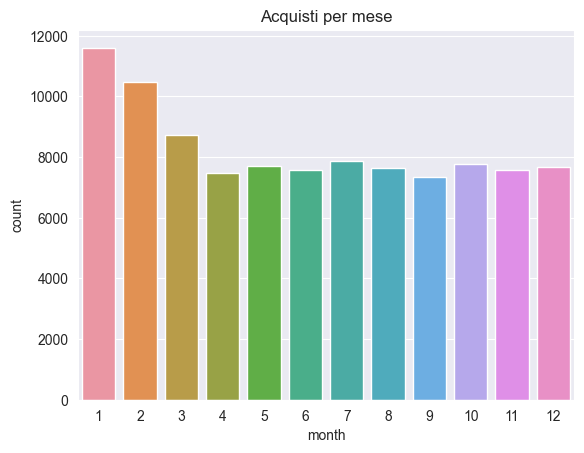

In [188]:
df = dfCopyGenderPayment.copy()
# Aggiungo la colonna "month" al dataframe
df['month'] = df.invoice_date.str.split("/", expand = True)[1]
# Aggiungo la colonna "year" al dataframe
df['year'] = df.invoice_date.str.split("/", expand = True)[2]
df['year'].replace(['2021','2022','2023'], [2021,2022,2023], inplace=True)
df['month'].replace(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
df['month'].replace(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
dfCopy = df.copy()
dfCopy = dfCopy.drop(columns=['invoice_date'])
dfCopy.head(20)
fh = sb.countplot(x = dfCopy['month']).set_title('Acquisti per mese')

In [189]:
dfCopy.head()

,gender,age,category,quantity,price,payment_method,shopping_mall,month,year
0,0,28,Clothing,5,1500.40,0,Kanyon,8,2022
1,1,21,Shoes,3,1800.51,0,Forum Istanbul,12,2021
2,1,20,Clothing,1,300.08,1,Metrocity,11,2021
3,0,66,Shoes,5,3000.85,0,Metropol AVM,5,2021
4,0,53,Books,4,60.60,1,Kanyon,10,2021


Mostriamo il numero di vendite compiute per carte di credito e quello per contanti

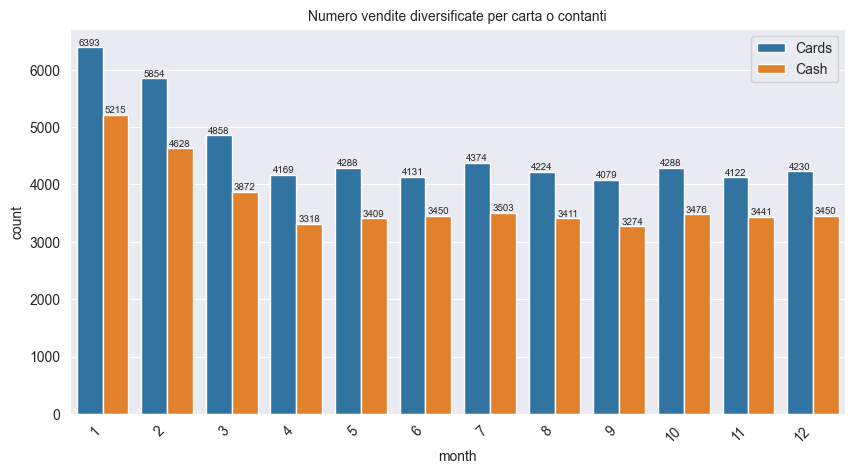

In [190]:
plt.figure(figsize = (10,5))
ax = sb.countplot(x = 'month', hue = 'payment_method', data = dfCopy)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment ='right', fontsize=10)
plt.title("Numero vendite diversificate per carta o contanti", fontsize = 10)
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Cards','Cash'], bbox_to_anchor=(1,1))
for bars in ax.containers:
  ax.bar_label(bars, fontsize=7)

plt.show()

In [191]:
dfSplitAge = dfCopy.copy()
dfSplitAge['age'].replace(
    [18, 19, 20, 21, 
     22, 23, 24, 25, 
     26, 27, 28, 29, 
     30, 31, 32, 33, 
     34, 35, 36, 37, 
     38, 39, 40, 41, 
     42, 43, 44, 45, 
     46, 47, 48, 49, 
     50, 51, 52, 53, 
     54, 55, 56, 57, 
     58, 59, 60, 61, 
     62, 63, 64, 65, 
     66, 67, 68, 69], 
    [18.21, 18.21, 18.21, 18.21,    
     22.25, 22.25, 22.25, 22.25, 
     26.29, 26.29, 26.29, 26.29,
     30.33, 30.33, 30.33, 30.33,
     34.37, 34.37, 34.37, 34.37,
     38.41, 38.41, 38.41, 38.41,
     42.45, 42.45, 42.45, 42.45, 
     46.49, 46.49, 46.49, 46.49,  
     50.53, 50.53, 50.53, 50.53,
     54.57, 54.57, 54.57, 54.57,
     58.61, 58.61, 58.61, 58.61, 
     62.65, 62.65, 62.65, 62.65,
     66.69, 66.69, 66.69, 66.69], inplace=True)

#labels = ['18-21', '22-25', '26-29', '30-33', '34-37', '39-41', '42-45', '46-49', '50-53', '54-57', '58-61', '62-65', '66-69']
#ccd = sb.countplot(y = dfSplitAge['age']).set_yticklabels(labels)
dfSplitAge.head()


,gender,age,category,quantity,price,payment_method,shopping_mall,month,year
0,0,26.29,Clothing,5,1500.40,0,Kanyon,8,2022
1,1,18.21,Shoes,3,1800.51,0,Forum Istanbul,12,2021
2,1,18.21,Clothing,1,300.08,1,Metrocity,11,2021
3,0,66.69,Shoes,5,3000.85,0,Metropol AVM,5,2021
4,0,50.53,Books,4,60.60,1,Kanyon,10,2021


Trasformo la colonna 'category' e la colonna 'shopping_mall' da stringhe in dati numerici e mostro come variano in base all'età le abitudini di acquisto

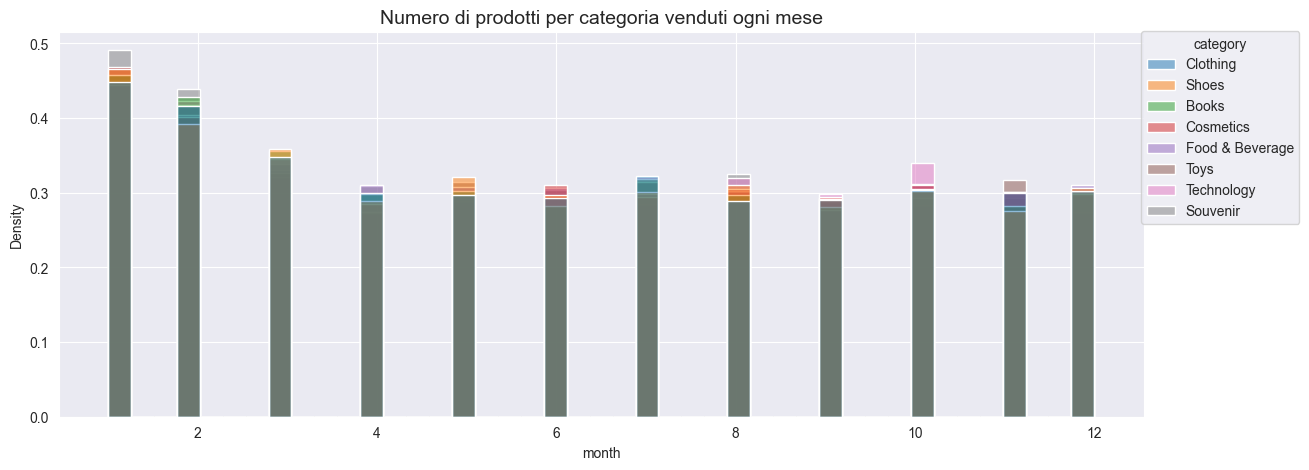

In [192]:
dfCategories = dfCopy.copy()
#dfCategories['category'].replace(['Clothing', 'Cosmetics', 'Food & Beverage', 'Toys', 'Shoes', 'Souvenir', 'Technology', 'Books'], [1,2,3,4,5,6,7,8], inplace=True)
#dfCategoriesMall = dfCategories.copy()
#dfCategoriesMall['shopping_mall'].replace(['Mall of Istanbul', 'Kanyon', 'Metrocity', 'Metropol AVM', 'Istinye Park', 'Zorlu Center', 'Cevahir AVM', 'Forum Istanbul', 'Viaport Outlet', 'Emaar Square Mall'], [0,1,2,3,4,5,6,7,8,9], inplace=True)

#dfCatGen = dfCategoriesMall.copy()
#dfCatGen.drop(columns=['invoice_date'])
#fig = px.histogram(dfCategories, x='category', y='price', color='gender', labels={'category': 'Category', 'gender': 'Gender'})
#fig.show()

plt.figure(figsize = (14,5))
cdfr = sb.histplot(dfCategories, x='month', hue='category', element='bars', stat='density', common_norm=False)
cdfr.set_title('Numero di prodotti per categoria venduti ogni mese', fontsize=14)
sb.move_legend(obj=cdfr, loc = 'upper right', bbox_to_anchor=(1.15,1.019))

#dfCatGen.head()

In [193]:
dfCategories['shopping_mall'].value_counts()

Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64

Controlliamo la dimensionalità dei vari attributi

In [194]:
dfCategories.nunique()

gender             2
age               52
category           8
quantity           5
price             40
payment_method     2
shopping_mall     10
month             12
year               3
dtype: int64

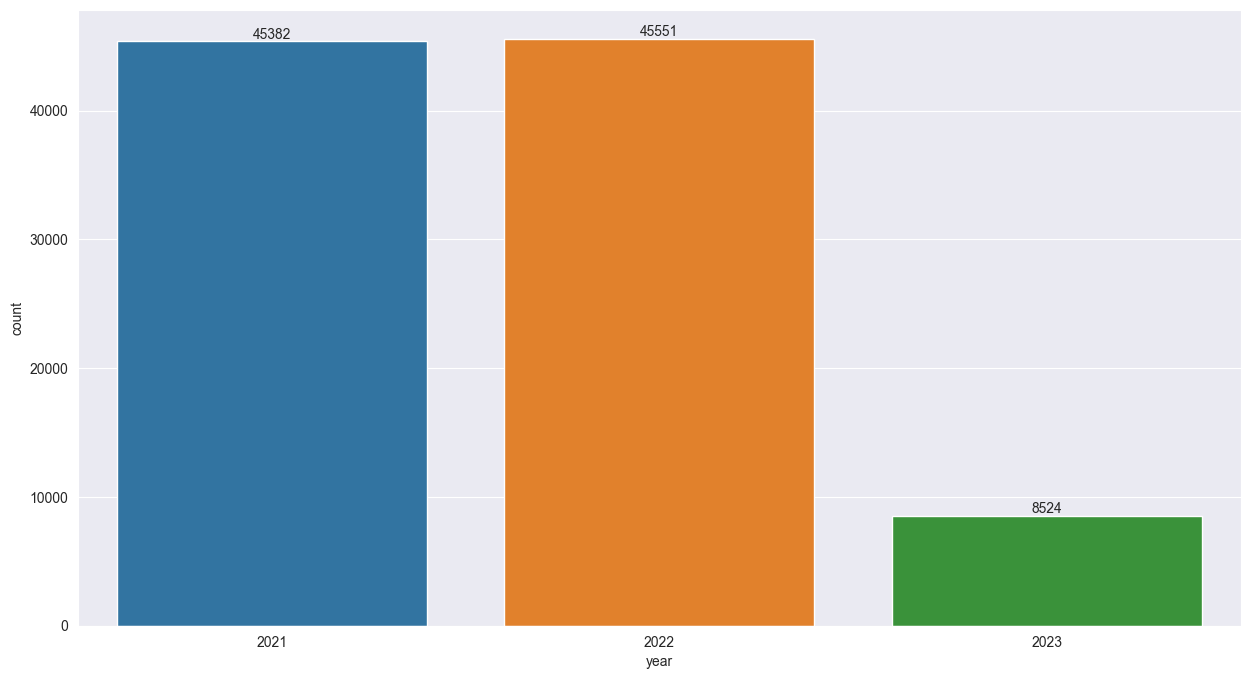

In [195]:
plt.figure(figsize=(15, 8))
ax = sb.countplot(x=dfCategories['year'])
plt.bar_label(ax.containers[0])
plt.show()

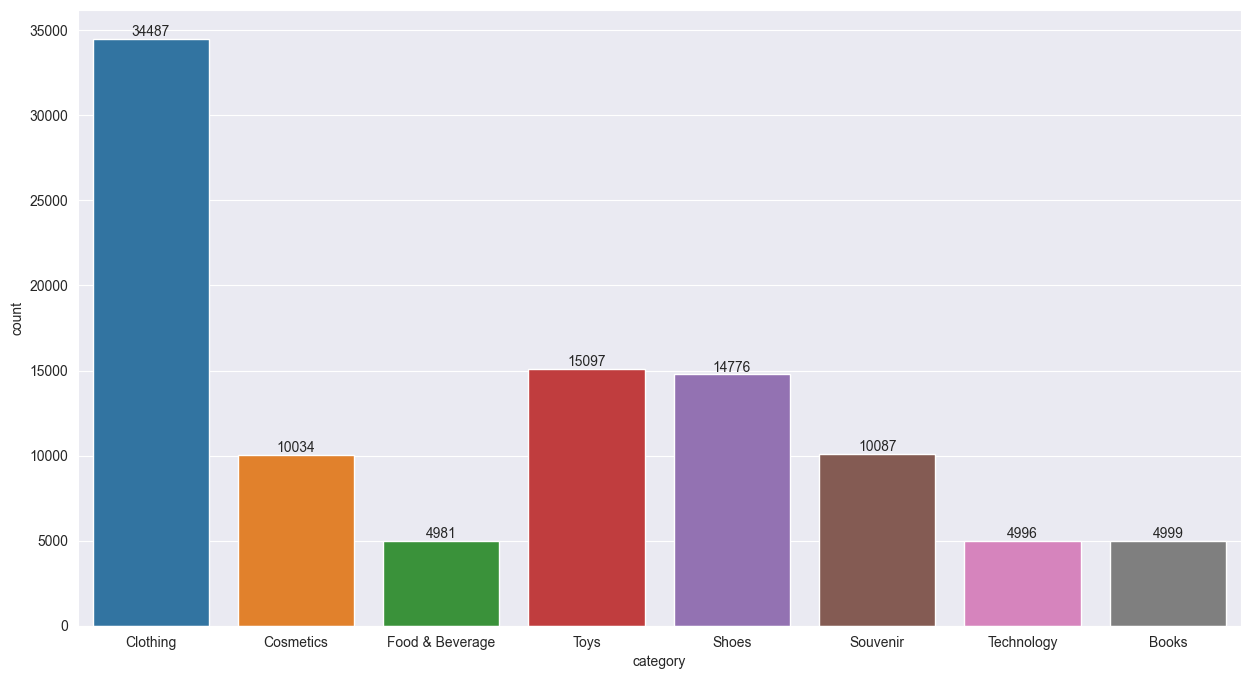

In [196]:
plt.figure(figsize=(15, 8))
ax = sb.countplot(x=dfCategories['category'])
ax.set_xticklabels(['Clothing', 'Cosmetics', 'Food & Beverage', 'Toys', 'Shoes', 'Souvenir', 'Technology', 'Books'])
plt.bar_label(ax.containers[0])
plt.show()

La feature 'category' è la feature sulla quale si vuole fare predizione.Ciò che possiamo notare è che è abbastanza sbilanciata. Si userà, in  seguito, il RandomOverSampler per fare oversample sui dati così da poterli bilanciare.

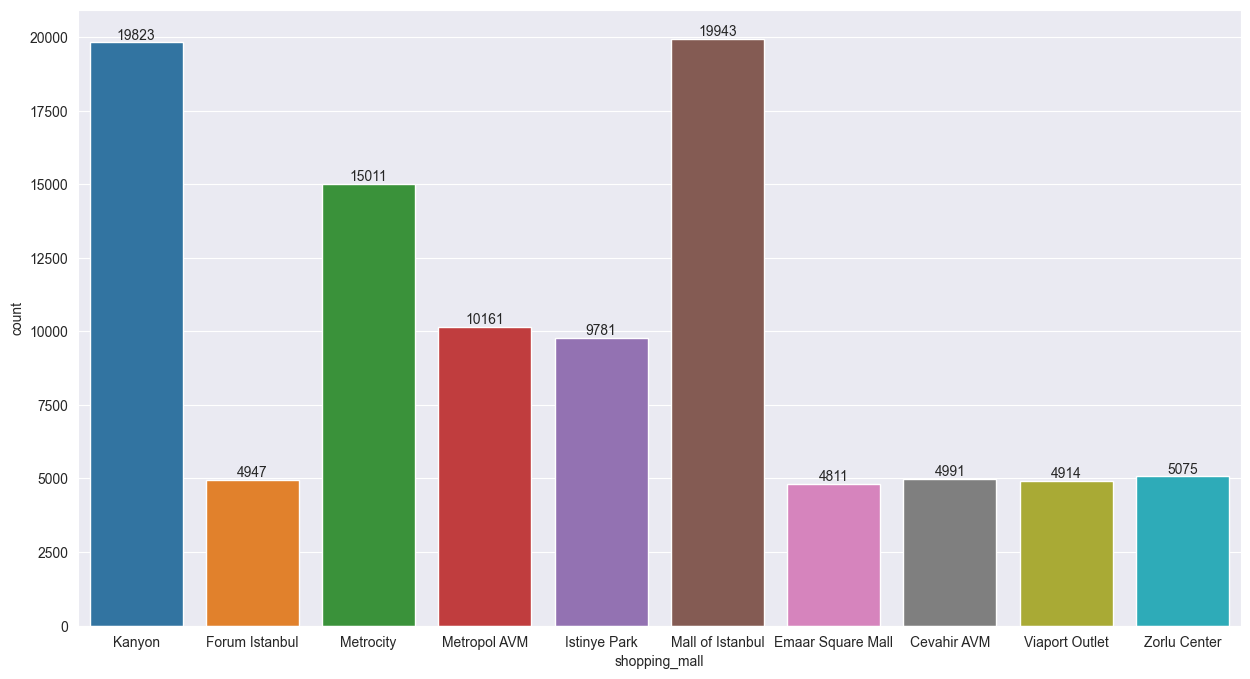

In [197]:
plt.figure(figsize=(15, 8))
ax = sb.countplot(x=dfCategories['shopping_mall'])
plt.bar_label(ax.containers[0])
plt.show()

In [198]:
dfCategories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          99457 non-null  int64  
 1   age             99457 non-null  int64  
 2   category        99457 non-null  object 
 3   quantity        99457 non-null  int64  
 4   price           99457 non-null  float64
 5   payment_method  99457 non-null  int64  
 6   shopping_mall   99457 non-null  object 
 7   month           99457 non-null  int64  
 8   year            99457 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 6.8+ MB


In [199]:
def calculate_product_percentage(data, attributo):
    # calcolo il numero di prodotti comprati per ogni genere
    gender_counts = data.groupby(attributo)['category'].count()
    total_count = gender_counts.sum()
    # calcolo la percentuale di prodotti comprati per ogni genere
    percentages = (gender_counts / total_count) * 100

    # Create a DataFrame from the calculated percentages
    result_df = pd.DataFrame({attributo.upper(): percentages.index, 'Percentage': percentages.values})

    return result_df

In [200]:
calculate_product_percentage(dfCategories,'gender')

,GENDER,Percentage
0,0,59.806751
1,1,40.193249


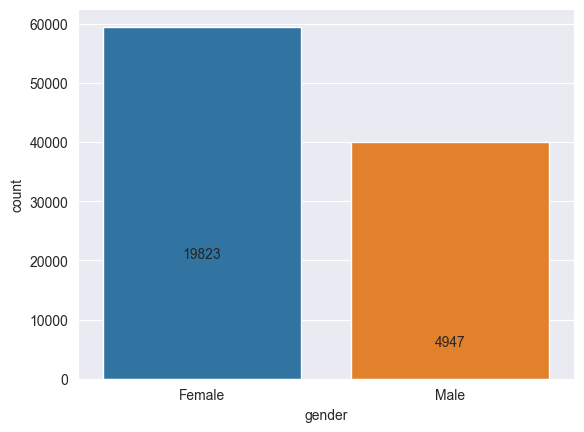

In [201]:
fig = sb.countplot(x=dfCategories['gender'])
plt.bar_label(ax.containers[0])
fig.set_xticklabels(['Female', 'Male'])
plt.show()

Come si può vedere dal grafico e dalla funzione, il 59% delle persone che acquistano prodotti sono donne, mentre il 41% sono uomini

#### CORRELAZIONE
Stampo e mostro in un grafico la matrice di correlazione delle feature così da capire quali sono gli attributi che hanno una maggiore importanza

In [202]:
df_cat= dfCategories.select_dtypes(include=['object']) #attributi categorici
df_num= dfCategories.select_dtypes(include=[np.number]) #attributi numerici
df_num.head()

,gender,age,quantity,price,payment_method,month,year
0,0,28,5,1500.40,0,8,2022
1,1,21,3,1800.51,0,12,2021
2,1,20,1,300.08,1,11,2021
3,0,66,5,3000.85,0,5,2021
4,0,53,4,60.60,1,10,2021


In [203]:
df_encoded = pd.concat([df_cat,df_num],axis=1)
for attr in df_encoded.columns:
    df_encoded[attr] = LabelEncoder().fit_transform(df_encoded[attr])
df_encoded.head()

,category,shopping_mall,gender,age,quantity,price,payment_method,month,year
0,1,4,0,10,4,32,0,7,1
1,4,2,1,3,2,33,0,11,0
2,1,6,1,2,0,25,1,10,0
3,4,7,0,48,4,36,0,4,0
4,0,4,0,35,3,15,1,9,0


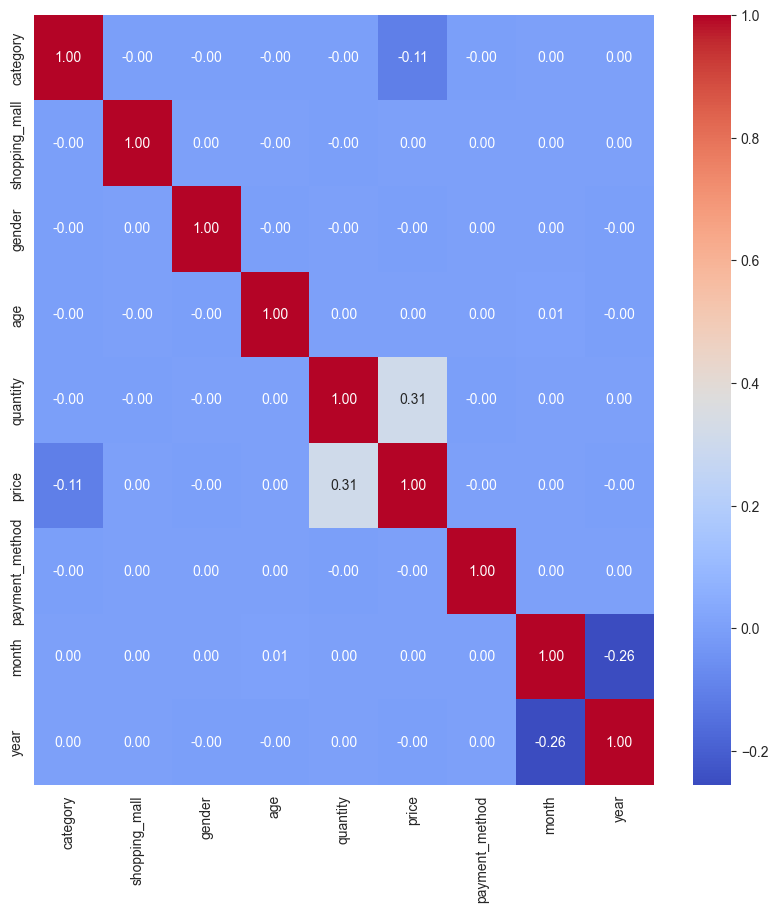

In [204]:
#matrice di correlazione
matr_corr = df_encoded.corr()
#uso una heatmap per mostrare la matrice di correlazione
plt.figure(figsize=(10,10))
sb.heatmap(matr_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Data la matrice di correlazione andiamo ad usare il RandomForest per capire il grado di importanza delle feautures

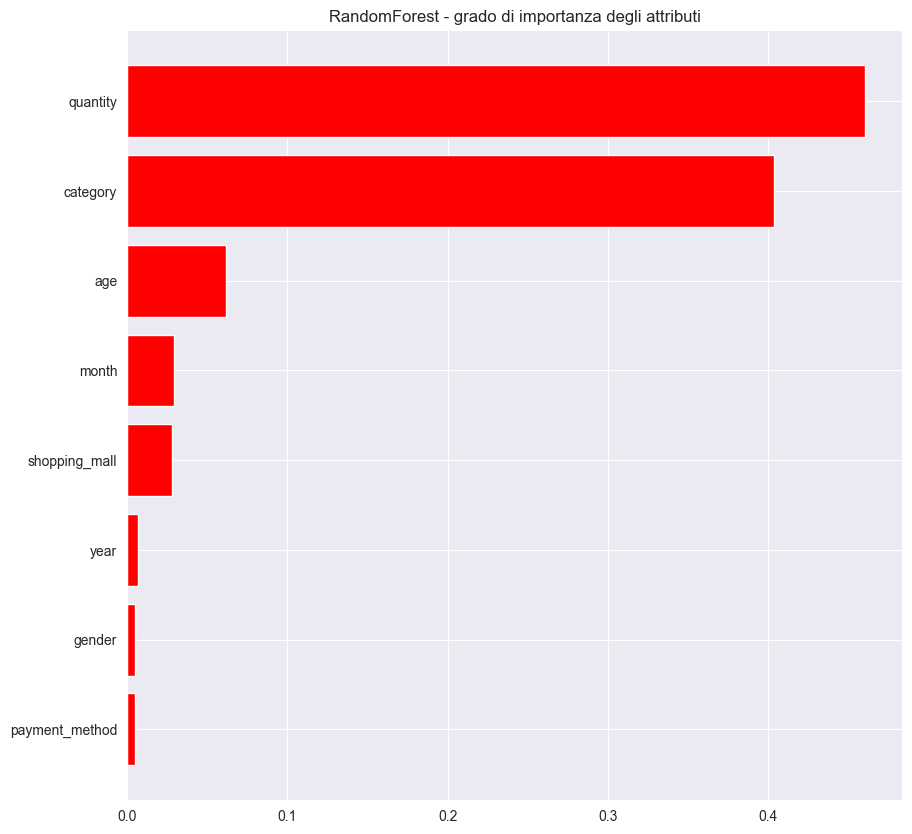

In [205]:
attr = 'price'
df_encoded_y = df_encoded[attr]
df_encoded_x = df_encoded.drop(attr, axis=1)
forest = RandomForestClassifier()
forest.fit(df_encoded_x,df_encoded_y)

attributi = df_encoded_x.columns
importances = forest.feature_importances_ #grado di importanza fra tutti gli attributi
index = np.argsort(importances) #mappa ogni grado di importanza con l-attributo corrispondente

plt.figure(figsize=(10,10))
plt.title('RandomForest - grado di importanza degli attributi')
plt.barh(range(len(index)), importances[index], color='r', align='center')
plt.yticks(range(len(index)), attributi[index])
plt.show()

Visti i gradi di importanza dati dalla matrice di corelazione e in seguito dal random forest decidiamo di droppare gli attributi meno importanti, ovvero: "gender", "year", payment_method"

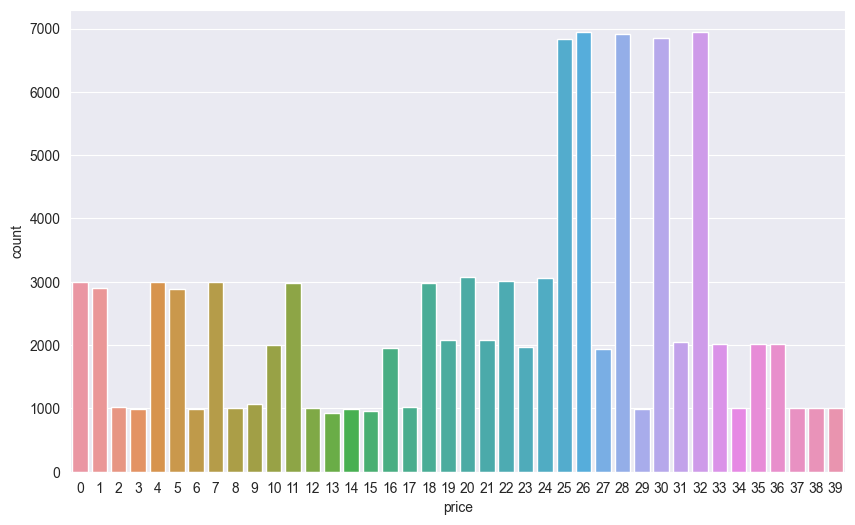

In [206]:
df_final = df_encoded.drop(columns=[], axis=1)
df_final.to_csv('df_final.csv', index=False)

plt.figure(figsize=(10,6))
ax = sb.countplot(x=df_final[attr])

#### Bilanciamento dataset e campionamento
Fatto ciò andiamo a bilanciare il dataset, in particolare andiamo a vedere come sono distribuite le tuple all'interno della colonna 'category'

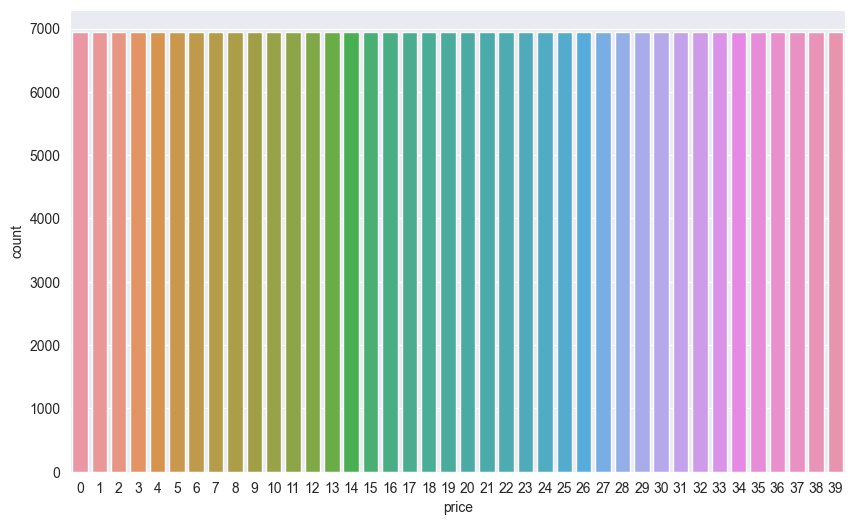

In [207]:
dfBalanced = df_final.copy()

X_class = dfBalanced.drop(attr, axis=1)
y_class = dfBalanced[attr]

#oversampler = RandomOverSampler()
#x_oversampled, y_oversampled = oversampler.fit_resample(x,y)

#oversampled_df = dfBalanced.copy()

#ax = ax.set_xticklabels(['Clothing', 'Cosmetics', 'Food & Beverage', 'Toys', 'Shoes', 'Souvenir', 'Technology', 'Books'])

smote = SMOTE(random_state=35)
X_smote_class, y_smote_class = smote.fit_resample(X_class, y_class)
oversampled_df = pd.concat([X_smote_class,y_smote_class], axis=1)
plt.figure(figsize=(10,6))
ax = sb.countplot(x=oversampled_df[attr])

In [208]:
oversampled_df.shape

(278000, 9)

In [209]:
oversampled_df.sample(n=150000, random_state=35) #n e random_state sono dei numeri casuali
oversampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278000 entries, 0 to 277999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   category        278000 non-null  int32
 1   shopping_mall   278000 non-null  int32
 2   gender          278000 non-null  int64
 3   age             278000 non-null  int64
 4   quantity        278000 non-null  int64
 5   payment_method  278000 non-null  int64
 6   month           278000 non-null  int64
 7   year            278000 non-null  int64
 8   price           278000 non-null  int64
dtypes: int32(2), int64(7)
memory usage: 17.0 MB


C:\Users\pasqu\AppData\Local\Temp\ipykernel_16228\1308874763.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  oversampled_df.hist(ax=ax)


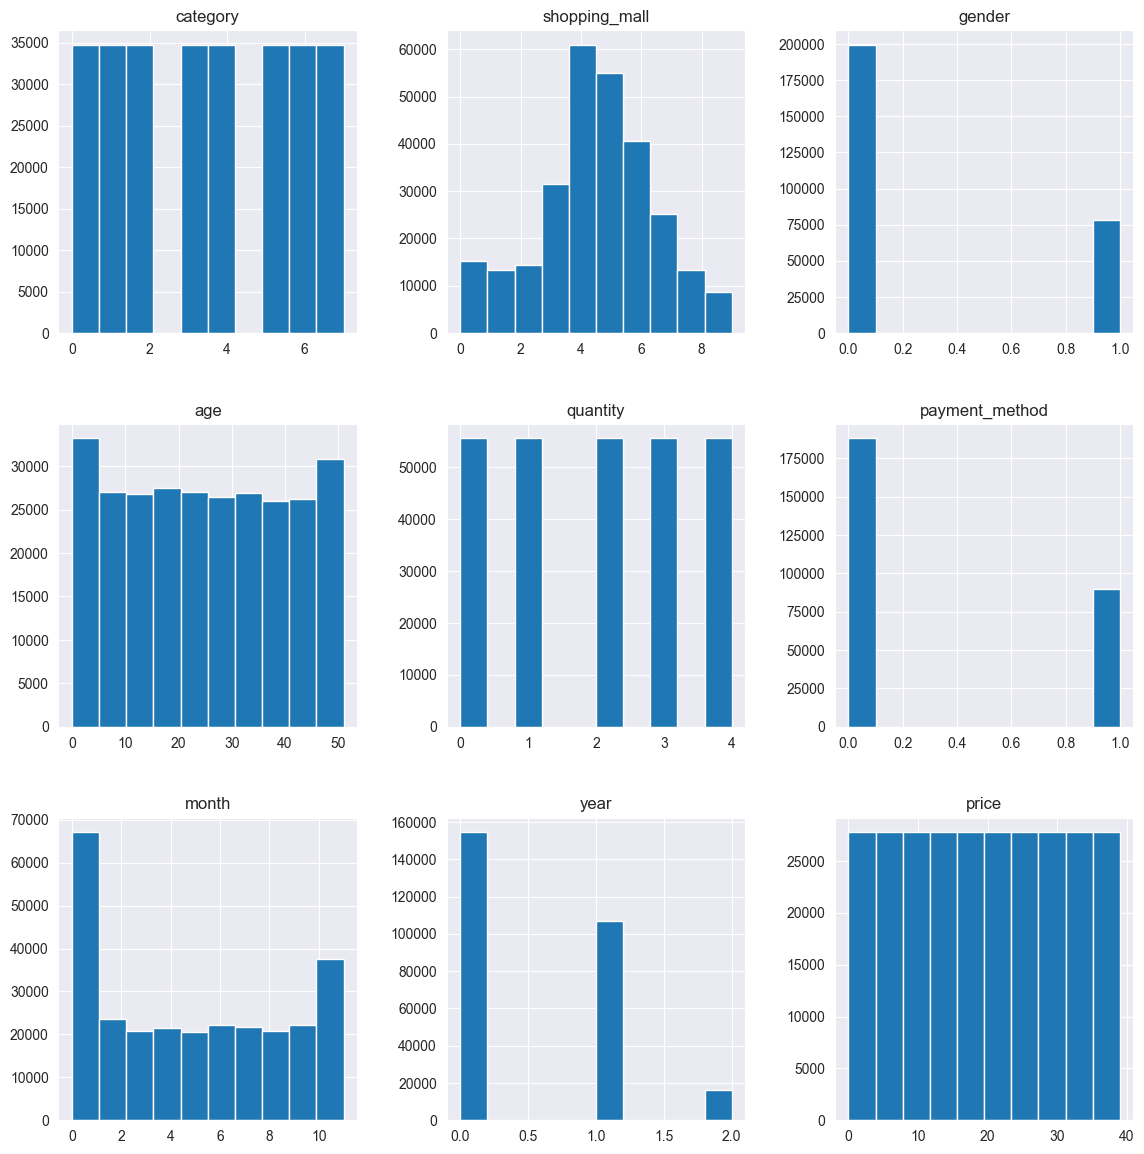

In [210]:
fig, ax = plt.subplots(figsize=(10,10))
oversampled_df.hist(ax=ax)
plt.subplots_adjust(right=1.2,top=1.2)
plt.show()

In [211]:
oversampled_df.to_csv('df_sampled.csv', index=False)

### Classificatori

In [212]:
sampled_df = pd.read_csv('df_sampled.csv')

Una volta finita la fase di data visualization e cleaning andiamo ad attuare le strategie di classificazione. Divido il dataset in ***training set*** e ***test set***. Il training set sarà usato per costruire il modello, il test sarà usato per testare le performance dello stesso. La suddivisione prevedere di utilizzare 2/3 del dataset per il training set, e il restante per il test set.

In [213]:
df_X = sampled_df.drop(attr, axis=1)
df_Y = sampled_df[attr]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, random_state=0)
y_train = y_train.values.ravel() #trasformazione richiesta per gli algoritmi

#### Metriche utilizzate per la valutazione

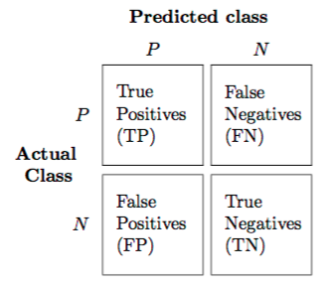

In [214]:
image = 'confusion_matrix.png'
Image(filename=os.path.join(image),width=300)

Per introdurre le metriche che verranno utilizzate durante le analisi dobbiamo fare riferimento alla matrice di confusione. Questa è una matrice quadrata in cui le righe sono i valori corretti della classe mentre le colonne sono i valori predetti dal modello per la classe. Un problema di classificazione binaria presenta la seguente matrice di confusione:

A questo punto possiamo definire le metriche come segue:
* Accuracy (accuratezza):
  L'Accuracy rappresenta la percentuale di previsioni corrette rispetto al totale delle istanze valutate. È una misura di quanto il modello sia in grado di classificare correttamente gli esempi.

* Error Rate (tasso di errore):
  L'Error Rate è la misura complementare all'Accuracy e rappresenta la percentuale di previsioni errate rispetto al totale delle istanze valutate. Indica la percentuale di errori compiuti dal modello di classificazione.

* Precision (precisione):
  La Precision rappresenta la percentuale di previsioni positive corrette rispetto al totale delle previsioni positive effettuate dal modello. Misura l'accuratezza delle previsioni positive e fornisce un'indicazione sulla proporzione di elementi correttamente identificati come positivi rispetto al numero totale di elementi identificati come positivi.

* Recall (richiamo):
  La Recall rappresenta la percentuale di previsioni positive corrette rispetto al totale dei veri positivi e dei falsi negativi. Misura la capacità del modello di individuare correttamente gli elementi positivi, considerando sia i veri positivi (elementi correttamente classificati come positivi) che i falsi negativi (elementi erroneamente classificati come negativi).

* F-measure (misura F):
  L'F-measure rappresenta la media armonica tra Precision e Recall. È una misura che tiene conto sia della precisione che del richiamo del modello. L'F-measure fornisce un singolo valore che combina queste due misure, consentendo di valutare complessivamente le prestazioni del modello.

Per calcolare queste metriche, è necessario utilizzare i valori corrispondenti dalla matrice di confusione (TP, TN, FP, FN). Ogni metrica ha una formula specifica per il calcolo basata su questi valori.

Calcolate nel seguente modo.

\begin{align*}
\text{Accuracy} &= \frac{TP + TN}{TP + TN + FP + FN} \\
\text{Error Rate} &= \frac{FP + FN}{TP + TN + FP + FN} \\
\text{Precision} &= \frac{TP}{TP + FP} \\
\text{Recall} &= \frac{TP}{TP + FN} \\
\text{F1-Score} &= 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
\end{align*}


Vediamo la curva di **AUC-ROC**

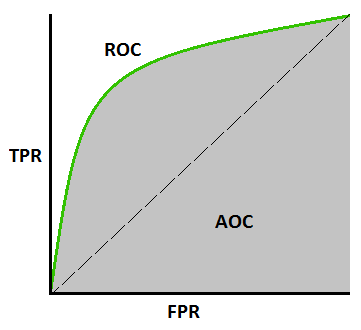

In [215]:
image2 = 'auc-roc.png'
Image(filename=os.path.join(image2),width=350)

\begin{align*}
\text{Sensitivity} &= \text{Recall} = \frac{TP}{TP + FN} \\
\text{Specificity} &= \frac{TN}{TN + FP} \\
\text{False Positive Rate} &= 1 - \text{Specificity} = \frac{FP}{TN + FP} \\
\end{align*}

La curva ROC (Receiver Operating Characteristic) è un grafico utilizzato per valutare le prestazioni di un modello di classificazione binaria. Mostra come variano il tasso di veri positivi (TPR) e il tasso di falsi positivi (FPR) al variare della soglia di classificazione del modello.

Nella curva ROC, l'asse verticale rappresenta la capacità del modello di individuare correttamente gli esempi positivi (TPR). Più il TPR è alto, migliore è il modello nell'identificare correttamente gli esempi positivi.

L'asse orizzontale rappresenta la proporzione di esempi negativi erroneamente classificati come positivi (FPR). Più il FPR è basso, migliore è il modello nel limitare gli errori di classificazione degli esempi negativi.

La curva ROC viene generata variando la soglia di classificazione del modello. Per ogni soglia, vengono calcolati il TPR e il FPR corrispondenti. Ogni punto sulla curva rappresenta una combinazione di TPR e FPR a una specifica soglia.

Definisco a questo punto dei dataframe utili per il salvataggio dei dati

In [216]:
# data frame per risultati dei modelli per la cross-validation
results= pd.DataFrame(columns=['NomeModello','Accuracy','ErrorRate','Precision','Recall','F-score','Time'])

In [217]:
def valuta_performance(nomeModello, modello, X, y, data,temp):
    indici = data[data['NomeModello'] == nomeModello].index
    for j in range(len(indici)):
        data.drop(indici[j], inplace = True)
    accuracy = cross_val_score(modello, X ,y, cv=10 ,scoring="accuracy").mean()
    error = (1-accuracy)
    precision = cross_val_score(modello, X ,y, cv=10 ,scoring="average_precision").mean()
    recall = cross_val_score(modello, X ,y, cv=10 ,scoring="recall_micro").mean()
    f_score = cross_val_score(modello, X ,y, cv=10 ,scoring="f1_micro").mean()

    row = pd.DataFrame({'NomeModello': [nomeModello],
                        'Accuracy': [accuracy],
                        'ErrorRate': [error],
                        'Precision': [precision],
                        'Recall': [recall],
                        'F-score': [f_score],
                        'Time': [temp]})

    data = pd.concat([data, row], ignore_index=True)

    return data

In [218]:
# dataframe utili per il plotting delle performance dei classificatori
models=["Albero_Decisionale",]
results_test= pd.DataFrame(index=models,columns=["accuracy","balanced_accuracy","precision","w_precision","recall","w_recall","f1"])
results_train= pd.DataFrame(index=models,columns=["accuracy","balanced_accuracy","precision","w_precision","recall","w_recall","f1"])

In [219]:
# dataframe specifico per le ANN
models_neural=["ANN","MLP"]
results_test_neural= pd.DataFrame(index=models_neural,columns=["accuracy","balanced_accuracy","precision","w_precision","recall","w_recall","f1"])

In [232]:
# funzione per salvare gli score dei relativi modelli
def set_scores(df,model,label,predicted):
    df.loc[model]["f1"]=f1_score(label, predicted, average='weighted')
    df.loc[model]["accuracy"]=accuracy_score(label, predicted)
    df.loc[model]["recall"]=recall_score(label, predicted, average='weighted')
    df.loc[model]["precision"]=precision_score(label, predicted, average='weighted')
    df.loc[model]["balanced_accuracy"]=balanced_accuracy_score(label, predicted)
    df.loc[model]["w_recall"]=recall_score(label, predicted,average='weighted')
    df.loc[model]["w_precision"]=precision_score(label, predicted,average='weighted')

In [221]:
# Lista degli score per la ROC
lista_predizioni = []

Di seguito vengono utilizzati vari modelli di classificazione addestrando ognuno di essi e poi utilizzando una **GridSearchCV** per la ricerca dei migliori iperparametri di un modello

#### Albero Decisionale
Un albero decisionale (o decision tree) è una struttura di dati ad albero utilizzata per prendere decisioni o fare previsioni in base a una serie di condizioni o attributi.
Può essere utilizzato per classificare esempi in diverse categorie o per stimare valori numerici (regressione). Gli alberi decisionali possono anche essere utilizzati per la selezione delle caratteristiche, l'individuazione di outlier e altre attività di analisi dei dati.

In [222]:
start = time.time()
albero = DecisionTreeClassifier(random_state=42)
albero = albero.fit(X_train, y_train)
stop = time.time()-start

In [223]:
result = valuta_performance('Albero Decisionale', albero, X_train, y_train, results, stop)

C:\Users\pasqu\.conda\envs\progettoDataMining\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pasqu\.conda\envs\progettoDataMining\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\pasqu\.conda\envs\progettoDataMining\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\pasqu\.conda\envs\progettoDataMining\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pasqu\.conda\env

#### Risultati Train set

In [233]:
y_pred_train_albero = albero.predict(X_train)

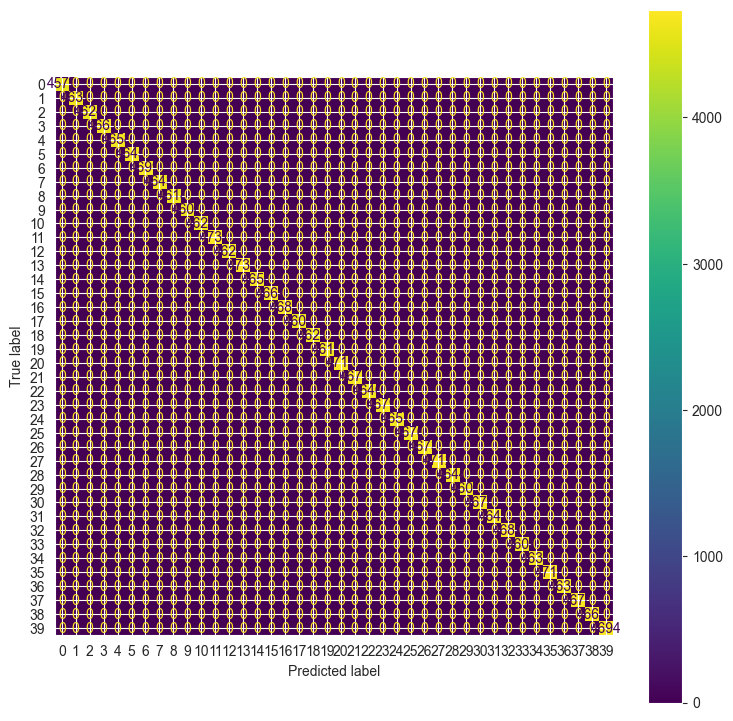

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4577
           1       1.00      1.00      1.00      4637
           2       1.00      1.00      1.00      4624
           3       1.00      1.00      1.00      4661
           4       1.00      1.00      1.00      4658
           5       1.00      1.00      1.00      4645
           6       1.00      1.00      1.00      4699
           7       1.00      1.00      1.00      4643
           8       1.00      1.00      1.00      4618
           9       1.00      1.00      1.00      4608
          10       1.00      1.00      1.00      4624
          11       1.00      1.00      1.00      4737
          12       1.00      1.00      1.00      4626
          13       1.00      1.00      1.00      4733
          14       1.00      1.00      1.00      4654
          15       1.00      1.00      1.00      4669
          16       1.00      1.00      1.00      4685
          17       1.00    

In [234]:
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_albero)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
fig, ax = plt.subplots(figsize=(9,9))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_train, y_pred_train_albero))

In [235]:
set_scores(results_train, "Albero_Decisionale", y_train, y_pred_train_albero)

#### Risultati test set

In [236]:
y_pred_test_albero = albero.predict(X_test)

In [237]:
lista_predizioni.append(y_pred_test_albero)

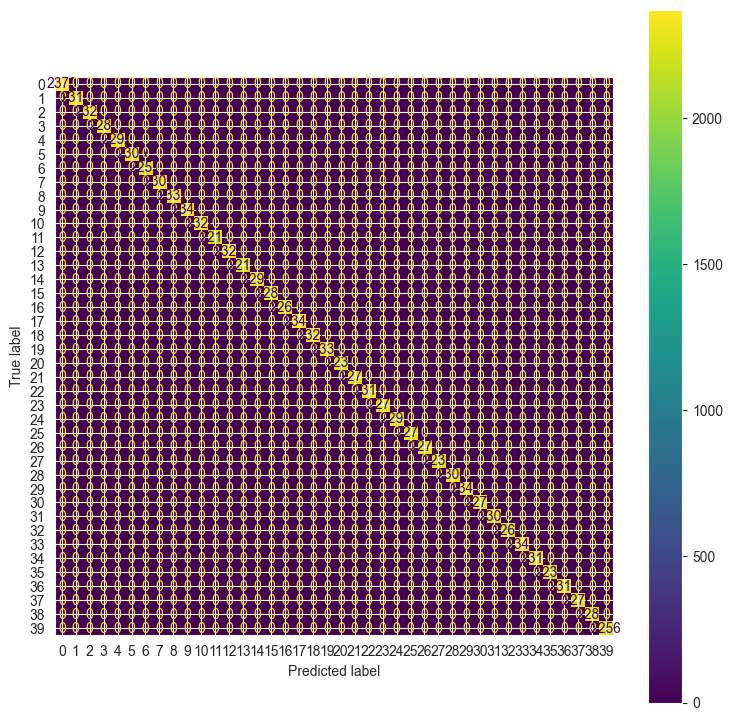

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2373
           1       1.00      1.00      1.00      2313
           2       1.00      1.00      1.00      2326
           3       1.00      1.00      1.00      2289
           4       1.00      1.00      1.00      2292
           5       1.00      1.00      1.00      2305
           6       1.00      1.00      1.00      2251
           7       1.00      1.00      1.00      2307
           8       1.00      1.00      1.00      2332
           9       1.00      1.00      1.00      2342
          10       1.00      1.00      1.00      2326
          11       1.00      1.00      1.00      2213
          12       1.00      1.00      1.00      2324
          13       1.00      1.00      1.00      2217
          14       1.00      1.00      1.00      2296
          15       1.00      1.00      1.00      2281
          16       1.00      1.00      1.00      2265
          17       1.00    

In [238]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_albero)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
fig, ax = plt.subplots(figsize=(9,9))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_test, y_pred_test_albero))

#### Naive Bayes

In [241]:
start = time.time()
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
stop = time.time() - start

In [242]:
results = valuta_performance("Naive Bayes Gaussian", nb, X_train, y_train, results, stop)

C:\Users\pasqu\.conda\envs\progettoDataMining\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pasqu\.conda\envs\progettoDataMining\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\pasqu\.conda\envs\progettoDataMining\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\pasqu\.conda\envs\progettoDataMining\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pasqu\.conda\env

#### Risultati Train set

In [243]:
y_pred_train_bayes = nb.predict(X_train)

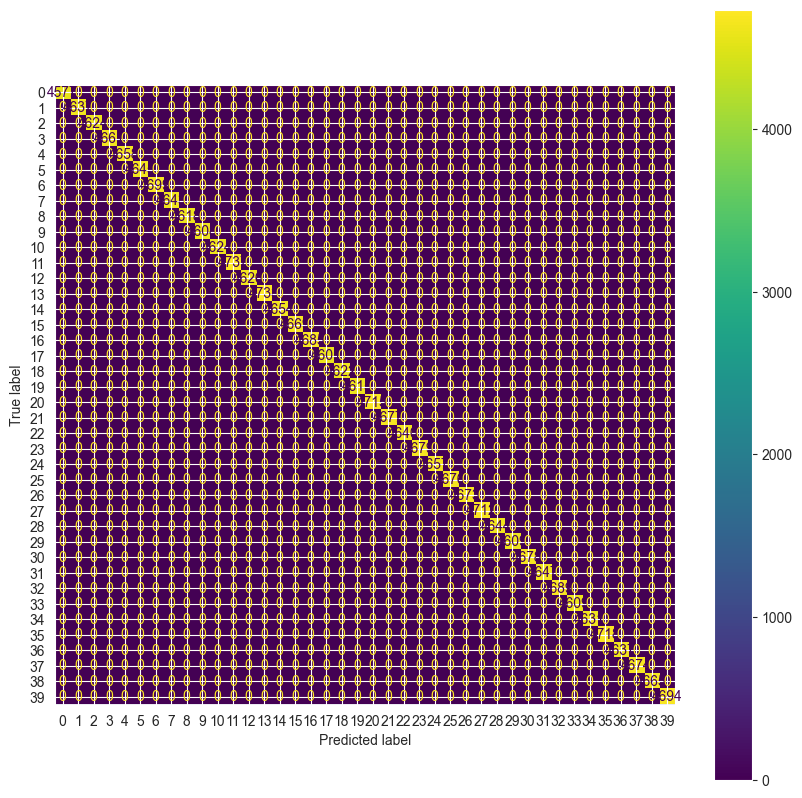

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4577
           1       1.00      1.00      1.00      4637
           2       1.00      1.00      1.00      4624
           3       1.00      1.00      1.00      4661
           4       1.00      1.00      1.00      4658
           5       1.00      1.00      1.00      4645
           6       1.00      1.00      1.00      4699
           7       1.00      1.00      1.00      4643
           8       1.00      1.00      1.00      4618
           9       1.00      1.00      1.00      4608
          10       1.00      1.00      1.00      4624
          11       1.00      1.00      1.00      4737
          12       1.00      1.00      1.00      4626
          13       1.00      1.00      1.00      4733
          14       1.00      1.00      1.00      4654
          15       1.00      1.00      1.00      4669
          16       1.00      1.00      1.00      4685
          17       1.00    

In [248]:
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_bayes)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
fig, ax= plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_train, y_pred_train_bayes))

#### Logistic Regression

In [251]:
start = time.time()
logReg = LogisticRegression(random_state=42, max_iter=5000)
logReg = logReg.fit(X_train, y_train)
stop = time.time() - start

C:\Users\pasqu\.conda\envs\progettoDataMining\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [252]:
results = valuta_performance("Logistic Regression", logReg, X_train, y_train, results, stop)

C:\Users\pasqu\.conda\envs\progettoDataMining\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

#### Risultati Train Set

In [ ]:
y_pred_train_log = logReg.predict(X_train)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_bayes)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
fig, ax= plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_train, y_pred_train_log))

In [ ]:
results_train